# Text Classification Exam

Welcome to the Text Classification Practical Exam. In this exam, you will be tasked with building, training, and evaluating an NLP model to classify text data. You are provided with a labeled dataset containing both the text and its corresponding class labels.

Your objective is to develop a model that accurately predicts the class of the given text. Make sure to follow best practices in data preprocessing, model selection, and evaluation to achieve optimal results.

Good luck!
___

# Install and Import Needed Libraries

You can use `pyarabic` or any other library to pre-process and clean the Arabic text.

In [ ]:
!pip install pyarabic

In [ ]:
from pyarabic import araby
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download the Dataset

Please note that you are allowed to take a subset of this dataset, the reason for that is it might take a long time to train the model on.

In [ ]:
#!kaggle datasets download -d khaledzsa/sanad
#!unzip sanad.zip

In [366]:
df = pd.read_csv('sanad.csv')


# Data Exploration

Before diving into preprocessing and model building, it’s important to first explore the dataset to understand its structure, distribution, and key characteristics. This step will help you gain insights into the data and guide your decisions in subsequent steps. Here’s what to consider:

1. **Inspect the Data**:
   Start by looking at the first few rows of the dataset to get a sense of its structure. Check the columns, data types, and a few sample entries. This helps to ensure that the data is loaded correctly and gives you an initial overview of the content.

2. **Check for Missing Values**:
   Identify if there are any missing values in the dataset.

3. **Distribution of Labels**:
   Examine the distribution of the target labels (classes).

4. **Text Data Characteristics (Bonus)**:
   Analyze the length of the text data. It is useful to calculate the number of words or characters in each text sample to understand how long the texts are. This will help you set a suitable `max_length` for tokenization and padding later. You can plot a histogram of text lengths to visualize the distribution.

5. **Common Words and Vocabulary (Bonus)**:
   Explore the most frequent words in the text data.

In [ ]:
df.sample(20)

,text,label
27766,https://example.com/resource/إمامٌةّ المَرُأّة...,Religion
15359,https://example.com/resource/الفجّيرِةَ:ُ محمد...,Medical
19286,https://example.com/resource/قّتل ٌ1ٍ1 ٍمْسّلّ...,Politics
7819,https://example.com/resource/اُنخفض مْؤِشًر ٍس...,Finance
20085,https://example.com/resource/قضتُ مِحكمةِ عماٍ...,Politics
13124,"https://example.com/resource/العٍينّ ٌ- َ""اْلخ...",Medical
13133,https://example.com/resource/أّصدْر َصٍاحًب ال...,Medical
4486,https://example.com/resource/بدْأ ًمّشَروع ٌثق...,Culture
15198,https://example.com/resource/أٌبوظُبي َ- مًريْ...,Medical
14417,https://example.com/resource/أْبوظٌبيَ - «ُالْ...,Medical


In [ ]:
#all has links
#strip tashkeel
#remove puncts
#stemming
#remove stopwords

In [ ]:
df.isnull().sum() # 0

,0
text,0
label,0


In [ ]:
df.iloc[0]['text']  #Since tashkeel increases the length very much we are going to slice the data after removing it

'https://example.com/resource/الشاٌرقة -ْ محمِد وِلدٌ َمحمْدُ ٌسّاٍلمَعرٍضت مًسُاءٍ أًمسَ اَلأَول علَىِ ٍخْشبٌةّ مسرح قصَر ّالثْقًافةً ٌفي اِلشاْرقُة ٍاًلمسرِحية ٍاٍلسْعٍودْيَة ً"ْبَعيُدْاًّ عن اٌلسيطرة"ّ ًلِفرقةَ مَسّرُحَ ًاِلطِاٌئف،ّ ْمن ّتٌأٌليُف فُهًدِ ّرّدِةَ الحاّرثي، ّوٌإُخراًج َسٍاٌمَي ًصّاَلٍحٍ الزَهرانيّ،ْ ٌوُذّلكّ فٌيً َرٌابعٍةٌ ٌليالي ِالدورْةَ اَلأوٌلى ٌمن مًهرًجِانٌ اْلشْارِقُة لّلّمَسُرٌحْ الخليجي ٌ.تًبًدَأْ اْلْمسرٍحيٍة بثًلاٍثّة َأشخاٍصٍ ٍيجٍلْسِونَ ُفي قاعةِ مّكتبةِ،ٌ ًيِنهمُك كٌل َمْنهٌمٌ ّفي ُالقرِاءة بْشغَف،ِ ُثُم يبِدأِوْن ًفيَ الٍحوٌاُر لنٍكُتشُفُ ُأِنهمّ كاْنوّاٌ ْيِقُرَأّونْ ِروٍاياّت لُأستُاّذهم ًالكِاتِب اّلمٌبدَعَ ُالٍذيٍ مِاْت ُوْتِرْك ُرِوايٌاتَ فريَدَةً،ٍ ُرٌسم فْيهًا ِشْخُصًياُت ٍغاية فُي الُدُقٌة، ٌويتحدٌثونّ ْعنُ ضرورة تكِرٍيمَ ِأستْاّذُهًم،ٌ ويٍتِفِقون ُعُلْىّ طرٍيقّة ًخاصةّ َلًلتكرّيم وُهيٌ ِإُخرٍاّج ُشِخصِيٌاتَه ًمنُ ْرِواياٍتها ٍلٍتَعٍيٍش في ّاٍلوْاقًع، وِيًنتِقّونً شِخُصيًاتٌ مركزيُة، ٍأْولها ْاُلحِلاق ٍاٍلذي ٍكٍان ًطَيًبًاًُ،ٌ حْافٍظاً لأُسرّاٌر 

In [ ]:
df['label'].value_counts() #almost balanced we will check it laaaater after preprocessing

,count
label,
Politics,6334
Medical,6292
Culture,6098
Finance,6095
Tech,5979
Sports,5859
Religion,3228


In [367]:
def unique_words(data):
  text = data['text'].str.cat(sep=" ")
  return set(text.split())

In [368]:
len(unique_words(df)) #not a good choice since we still have tashkeel

7693013

In [369]:
df['length'] = df['text'].str.split().str.len()

In [370]:
df['length'].max()

700

<Axes: xlabel='length', ylabel='Count'>

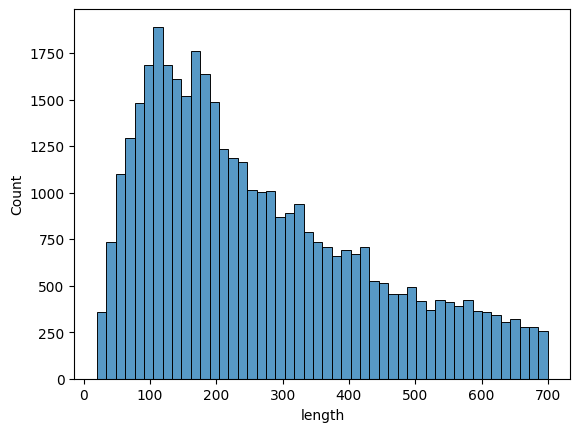

In [ ]:
import seaborn as sns
sns.histplot(df['length'])

# Data Cleaning and Preprocessing

In this section, we will focus on cleaning and filtering the dataset, preparing it for the text classification task. We will implement the following steps:

1. **Remove missing values**:
   First, we eliminate any rows with missing values to ensure the dataset is complete and consistent.

2. **Filter by text length (Bonus)**:
   To maintain a uniform dataset, we will filter the text samples by a specified word count range. This ensures that the texts are neither too short to lack context nor too long to introduce unnecessary complexity.

3. **Arabic stopwords loading**:
   We load a list of Arabic stopwords to filter out commonly used but contextually insignificant words. This is an important step for improving the performance of the model, as stopwords do not contribute valuable information.

4. **Text cleaning**:
   We apply a series of text cleaning steps to standardize and simplify the text data. This involves:
   - **Removing links (URLs)**: Any URLs present in the text are removed as they are not meaningful for classification purposes.
   - **Removing special characters and punctuation**: This step removes any non-alphabetical characters, ensuring the text only contains meaningful words.
   - **Removing Arabic diacritics (Tashkeel) and elongated letters (Tatweel)**: Diacritical marks and elongated letters are stripped out to standardize the text.
   - **Removing Arabic stopwords**: Words that are part of the stopwords list are removed, as they do not add value to the classification task.
   - **Stemming or Lemmmatization**: Either stemming or lemmatization is applied to reduce words to their root or base form.
   - **Normalizing Hamza**: Any variation of the Hamza character is normalized for consistency.

   **Note:** Most of these you can do using the library [PyArabic](https://pyarabic.readthedocs.io/ar/latest/README.html#features)

5. **Final cleanup**:
   Apply the cleanup function to the feature column.

By following these steps, the text will be cleaned, filtered, and ready for tokenization!

In [371]:
 #no missing values

In [372]:
#Filtering length after removing tashkeel

In [373]:
from pyarabic.araby import strip_tashkeel, strip_tatweel

In [374]:
df['text'] = df['text'].apply(lambda x: strip_tashkeel(x))

In [375]:
df['text'] = df['text'].apply(lambda x: strip_tatweel(x))

In [376]:
len(unique_words(df)) #7 million less than before after stripping tashkeel and tatweel

608954

In [377]:
df

,text,label,length
0,https://example.com/resource/الشارقة - محمد ول...,Culture,682
1,https://example.com/resource/انطلقت في مثل هذه...,Culture,370
2,https://example.com/resource/أقيمت مساء أمس ال...,Culture,237
3,https://example.com/resource/باسمة يونس حينما ...,Culture,342
4,https://example.com/resource/قرر اتحاد الأدباء...,Culture,59
...,...,...,...
39880,https://example.com/resource/أعلنت شركة باناسو...,Tech,119
39881,https://example.com/resource/بتاريخ 28 مارس/آذ...,Tech,182
39882,https://example.com/resource/دبي: «الخليج» أبر...,Tech,175
39883,https://example.com/resource/LG GS290 Cookie F...,Tech,454


In [378]:
 #removing specific patterns before slicing based on length
elongation_pattern = r'(.)\1{3,}'  #removes duplicated characters ex: السسسسلام -> السلام
link_pattern = r"https?\S+|www\S+|\S+\.[a-zA-Z]{2,}" #removes links
removing_patterns = "|".join([elongation_pattern, link_pattern])

In [379]:
df['text'] = df['text'].str.replace(removing_patterns, '', regex=True)
df['length'] = df['text'].str.split().str.len() #words count for each text

In [380]:
max_len = df['length'].max()
max_len

699

In [381]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
df['txt_tokens'] = df['text'].map(word_tokenize)
df['txt_tokens']




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,txt_tokens
0,"[-, محمد, ولد, محمد, سالمعرضت, مساء, أمس, الأو..."
1,"[في, مثل, هذه, الأيام, من, العام, الفائت, فعال..."
2,"[مساء, أمس, الأول, في, إكسبو, الشارقة, ندوة, ح..."
3,"[يونس, حينما, قال, صاحب, السمو, الشيخ, الدكتور..."
4,"[اتحاد, الأدباء, والكتاب, الموريتانيين, عقد, م..."
...,...
39880,"[شركة, باناسونيك, عن, اطلاق, سلسلة, تلفزيونات,..."
39881,"[28, مارس/آذار, الماضي, وبين, الساعة, الثامنة,..."
39882,"[«, الخليج, », أبرمت, بلدية, دبي, مع, بلدية, ر..."
39883,"[GS290, Cookie, Freshهاتف, متحرك, جديد, من, إن..."


In [382]:
from collections import Counter

cnt = Counter()
df['txt_tokens'].apply(cnt.update)

# get most common word
cnt.most_common(30) #as we can see most of words are stopwords/puncts

[('في', 357649),
 ('من', 263165),
 ('.', 157989),
 ('على', 152603),
 ('إلى', 109508),
 ('أن', 90846),
 ('التي', 66430),
 (':', 60698),
 ('عن', 56187),
 ('«', 49036),
 ('»', 48662),
 ('%', 47243),
 ('مع', 46510),
 ('الذي', 42880),
 (')', 42597),
 ('(', 42505),
 ('خلال', 37904),
 ('ما', 37100),
 ('درهم', 36468),
 ('،', 33183),
 ('مليون', 29085),
 ('هذا', 28521),
 ('حيث', 27254),
 ('هذه', 25883),
 ('لا', 25561),
 ('أو', 25400),
 ('الله', 23575),
 ('بنسبة', 23101),
 ('بين', 22573),
 ('دبي', 21960)]

In [ ]:
df

,text,label,length,txt_tokens
0,- محمد ولد محمد سالمعرضت مساء أمس الأول على خ...,Culture,681,"[-, محمد, ولد, محمد, سالمعرضت, مساء, أمس, الأو..."
1,في مثل هذه الأيام من العام الفائت فعاليات مهر...,Culture,368,"[في, مثل, هذه, الأيام, من, العام, الفائت, فعال..."
2,مساء أمس الأول في إكسبو الشارقة ندوة حوارية ح...,Culture,236,"[مساء, أمس, الأول, في, إكسبو, الشارقة, ندوة, ح..."
3,يونس حينما قال صاحب السمو الشيخ الدكتور سلطان...,Culture,341,"[يونس, حينما, قال, صاحب, السمو, الشيخ, الدكتور..."
4,اتحاد الأدباء والكتاب الموريتانيين عقد مؤتمره...,Culture,58,"[اتحاد, الأدباء, والكتاب, الموريتانيين, عقد, م..."
...,...,...,...,...
39880,شركة باناسونيك عن اطلاق سلسلة تلفزيونات فييرا...,Tech,118,"[شركة, باناسونيك, عن, اطلاق, سلسلة, تلفزيونات,..."
39881,28 مارس/آذار الماضي وبين الساعة الثامنة والنص...,Tech,181,"[28, مارس/آذار, الماضي, وبين, الساعة, الثامنة,..."
39882,«الخليج» أبرمت بلدية دبي مع بلدية رأس الخيمة ...,Tech,174,"[«, الخليج, », أبرمت, بلدية, دبي, مع, بلدية, ر..."
39883,GS290 Cookie Freshهاتف متحرك جديد من إنتاج (إ...,Tech,453,"[GS290, Cookie, Freshهاتف, متحرك, جديد, من, إن..."


<Axes: xlabel='length', ylabel='Count'>

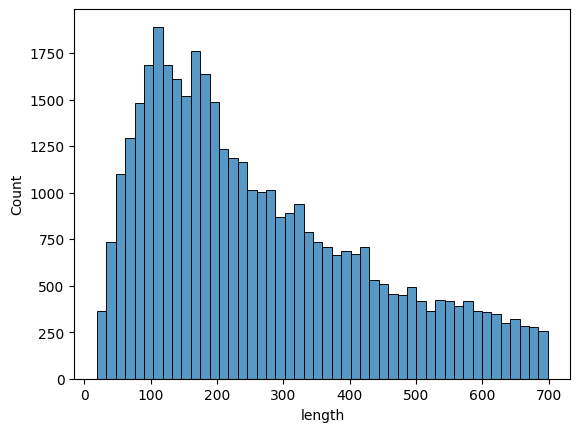

In [ ]:
sns.histplot(df['length'])

In [ ]:
df[df['length']<20]

,text,label,length,txt_tokens
6208,شركة رأس الخيمة للاسمنت الأبيض انها ستكشف عن ...,Finance,19,"[شركة, رأس, الخيمة, للاسمنت, الأبيض, انها, ستك..."
6243,شركة ميثاق للتأمين التكافلي، أمس، إدارة سوق أ...,Finance,19,"[شركة, ميثاق, للتأمين, التكافلي،, أمس،, إدارة,..."
6895,"""الخليج"":بلغت أرباح شركة ""دبي للتطوير"" في الع...",Finance,19,"[``, الخليج, '', :, بلغت, أرباح, شركة, ``, دبي..."
7231,اجتماع مجلس إدارة شركة الواحة كابيتال، وتمت م...,Finance,19,"[اجتماع, مجلس, إدارة, شركة, الواحة, كابيتال،, ..."
7424,شركة «شعاع كابيتال» أنها حصلت على موافقة هيئة...,Finance,19,"[شركة, «, شعاع, كابيتال, », أنها, حصلت, على, م..."
7902,مجموعة غولدمان ساكس المصرفية بشراء سهم شركة أ...,Finance,19,"[مجموعة, غولدمان, ساكس, المصرفية, بشراء, سهم, ..."
8060,العين الأهلية للتأمين أرباحا بلغت 2 .50 مليون...,Finance,19,"[العين, الأهلية, للتأمين, أرباحا, بلغت, 2, .50..."
8473,مجلس إدارة شركة دار التكافل في الرابع عشر من ...,Finance,19,"[مجلس, إدارة, شركة, دار, التكافل, في, الرابع, ..."
9131,عقد اجتماع مجلس إدارة دار التأمين الخميس المق...,Finance,19,"[عقد, اجتماع, مجلس, إدارة, دار, التأمين, الخمي..."
9223,مجلس إدارة شركة ميثاق للتأمين التكافلي، غدا، ...,Finance,19,"[مجلس, إدارة, شركة, ميثاق, للتأمين, التكافلي،,..."


<Axes: xlabel='length', ylabel='Count'>

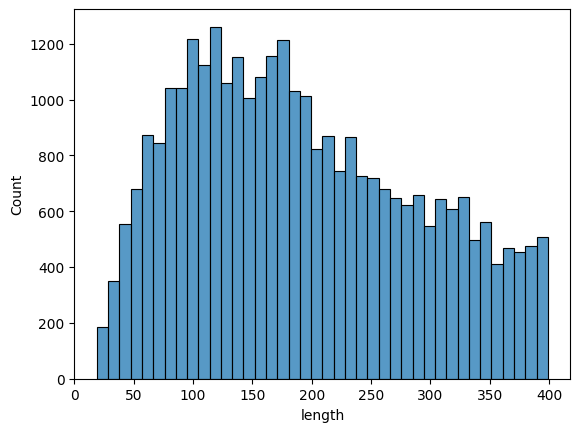

In [383]:
sns.histplot(df[df['length']<400]['length'])

In [384]:
df[df['length']<20]['text']

,text
6208,شركة رأس الخيمة للاسمنت الأبيض انها ستكشف عن ...
6243,شركة ميثاق للتأمين التكافلي، أمس، إدارة سوق أ...
6895,"""الخليج"":بلغت أرباح شركة ""دبي للتطوير"" في الع..."
7231,اجتماع مجلس إدارة شركة الواحة كابيتال، وتمت م...
7424,شركة «شعاع كابيتال» أنها حصلت على موافقة هيئة...
7902,مجموعة غولدمان ساكس المصرفية بشراء سهم شركة أ...
8060,العين الأهلية للتأمين أرباحا بلغت 2 .50 مليون...
8473,مجلس إدارة شركة دار التكافل في الرابع عشر من ...
9131,عقد اجتماع مجلس إدارة دار التأمين الخميس المق...
9223,مجلس إدارة شركة ميثاق للتأمين التكافلي، غدا، ...


In [385]:
#length<400  (no lower boundary since shortest length about 19  and its meaningful)
df = df[df['length']<200]

In [386]:
df

,text,label,length,txt_tokens
4,اتحاد الأدباء والكتاب الموريتانيين عقد مؤتمره...,Culture,58,"[اتحاد, الأدباء, والكتاب, الموريتانيين, عقد, م..."
7,أمس الأديب الإسباني ميجيل ديليبس الذي يعتبر و...,Culture,95,"[أمس, الأديب, الإسباني, ميجيل, ديليبس, الذي, ي..."
15,ميرفت الخطيب تلبية لدعوة حرم صاحب السمو الشيخ...,Culture,147,"[ميرفت, الخطيب, تلبية, لدعوة, حرم, صاحب, السمو..."
19,إدارة مسرح إسطنبولي وجمعية تيرو للفنون عن تنظ...,Culture,158,"[إدارة, مسرح, إسطنبولي, وجمعية, تيرو, للفنون, ..."
20,عن دار الكتب الوطنية في هيئة أبوظبي للثقافة و...,Culture,139,"[عن, دار, الكتب, الوطنية, في, هيئة, أبوظبي, لل..."
...,...,...,...,...
39872,موقع تيجوري، مركز التسوق الإلكتروني الأكبر في...,Tech,120,"[موقع, تيجوري،, مركز, التسوق, الإلكتروني, الأك..."
39876,مجموعة الفطيم أمس استحواذها على فيوتك لحلول ا...,Tech,192,"[مجموعة, الفطيم, أمس, استحواذها, على, فيوتك, ل..."
39880,شركة باناسونيك عن اطلاق سلسلة تلفزيونات فييرا...,Tech,118,"[شركة, باناسونيك, عن, اطلاق, سلسلة, تلفزيونات,..."
39881,28 مارس/آذار الماضي وبين الساعة الثامنة والنص...,Tech,181,"[28, مارس/آذار, الماضي, وبين, الساعة, الثامنة,..."


In [387]:
df.label.value_counts()

,count
label,
Sports,3759
Politics,3662
Medical,3394
Finance,2944
Tech,1841
Culture,1768
Religion,514


In [ ]:
punct_pattern = "[^ء-ي ]+"  #removing puncts, and some text has english -> this solves it too
df['text'] = df['text'].str.replace(punct_pattern, '', regex=True)


<ipython-input-227-1bf492a01d0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].str.replace(punct_pattern, '', regex=True)


In [ ]:

df['text'] = araby.normalize_hamza(df['text'], method="tasheel")  # https://github.com/linuxscout/pyarabic/blob/master/doc/features.md

<ipython-input-231-b98220f83a79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = araby.normalize_hamza(df['text'], method="tasheel")


In [ ]:
#applying stemming may produce a stopword so: stemming->stopwords
from nltk.stem.isri import ISRIStemmer
stemmer = ISRIStemmer()
df['text'] = df['text'].apply(lambda text: ' '.join([stemmer.stem(word) for word in text.split()]))

<ipython-input-228-eb513e9f4bc3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda text: ' '.join([stemmer.stem(word) for word in text.split()]))


In [ ]:
#removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('arabic'))

df['text'] = df['text'].apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-229-dfff8445bbd7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))


In [ ]:
df.sample(20)

,text,label,length,txt_tokens
22359,شرط حلة انه حبط هجو رهب وسع نطق اول امس جمهور ...,Politics,116,"[الشرطة, المحلية, أنها, أحبطت, هجوما, إرهابيا,..."
10157,شرك دار عقر شرك سهم عمة قيم دول ركم بدي عام بق...,Finance,114,"[شركة, الدار, العقارية, الشركات, المساهمة, الع..."
35891,خليجسجلت شرك جنرال موتورز نما بيع جي ام سي شهر...,Tech,115,"[-, ``, الخليج, '', :, سجلت, شركة, جنرال, موتو..."
35064,شرك جهز تنقل لشح بطر هتف حمل لمد بذل حجة لشح ه...,Tech,168,"[شركة, Lilliputian, Systems, جهازا, متنقلا, لش..."
32804,رئس جنب فرق جدد كخل موتلانتي رئس تحد دول لكر ق...,Sports,151,"[رئيس, جنوب, افريقيا, الجديد, كخاليما, موتلانت..."
16603,ران غزو وضح هجر حمد دير شفى رفأ نبة نطق ظفر ان...,Medical,101,"[رانيا, الغزاوي, أوضحت, هاجر, الحمادي, مديرة, ..."
8966,ورص دبي سلع امس انه عمد شرك اور رمج شرك جال كن...,Finance,171,"[بورصة, دبي, للذهب, والسلع،, أمس،, أنها, اعتمد..."
7071,ورص دبي سلع حجم دول يوم اي وقت مضى دول عقد بقم...,Finance,73,"[بورصة, دبي, للذهب, والسلع, أعلى, حجم, تداول, ..."
27034,حمد صلح قرق وقف شيخ عرب باب كعب فقل رب سئل ببك...,Religion,184,"[محمد, صالح, القرق, وقف, شيخ, أعرابي‮, ‬عند, ب..."
23383,امر سلم بن عبدالعزيز ال سعد ولي عهد نئب رئس جل...,Politics,109,"[الأمير, سلمان, بن, عبدالعزيز, آل, سعود, ولي, ..."


In [388]:
  import re
  punct_pattern = "[^ء-ي ]+"  #removing puncts, and some text has english -> this solves it too
  elongation_pattern = r'(.)\1{1,}'  #removes duplicated characters ex: السسسسلام -> السلام
  link_pattern = r"https?\S+|www\S+|\S+\.[a-zA-Z]{2,}" #removes links
  removing_pattern = "|".join([elongation_pattern, link_pattern])

  custom_stopwords = stop_words
 # custom_stopwords

In [389]:
def cleanup(text):

  #print(text)
  text = strip_tashkeel(text)
  text = strip_tatweel(text)
  text = re.sub(removing_patterns, r'\1', text)
  # text = ' '.join(re.sub(link_pattern, '\1', text))
  # print(text)
  # text = ' '.join(re.sub(elongation_pattern, r'\1', text))    Tests
  #text = re.sub(punct_pattern, "", ' '.join(text))

  #print(text)
  text = re.sub(punct_pattern, "", text)

  text = text.split()
  text = [araby.normalize_hamza(word, method="tasheel") for word in text] #https://github.com/linuxscout/pyarabic/blob/master/doc/features.md
  text = [stemmer.stem(word) for word in text]
  text = [word for word in text if word not in custom_stopwords] #nltk
  text = ' '.join(text)
  return text


In [390]:
df['text'] = df['text'].apply(cleanup)

<ipython-input-390-15a2ac3908bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(cleanup)


In [391]:
df['text'].str.split().str.len().max() # longest text ---> padding 200

174

In [398]:
df.drop(columns=['length','txt_tokens'], axis=1, inplace=True)

<ipython-input-398-3d068572aec6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['length','txt_tokens'], axis=1, inplace=True)


In [399]:
df.label.value_counts() #dropping religion since its very low
                        # better approach (data augmentation)
df = df[df['label']!='Religion']


In [400]:
df.label.value_counts()

,count
label,
Sports,3759
Politics,3662
Medical,3394
Finance,2944
Tech,1841
Culture,1768


# Tokenization, Padding, and Data Splitting

In this step, we will prepare the text data for input into a model by converting the text into numerical sequences, padding them to a uniform length, and splitting the dataset into training and testing sets. Here's an overview of the steps involved:

1. **Tokenization**:
   We use a tokenizer to convert the cleaned text into numerical sequences. You can use `Tokenizer` tokenizer from `tensorflow.keras.preprocessing.text` package or any other tokenizer you like.

2. **Text to sequences**:
   After fitting the tokenizer on the cleaned text, we transform each text into a sequence of numbers, where each number corresponds to a token (word) in the text.

3. **Padding the sequences**:
   Since different texts may vary in length, we pad the sequences to ensure they all have the same length.

4. **Label encoding**:
   The labels (target values) also need to be converted into numerical form if they are not encoded.

5. **Train-test split**:
   The dataset is divided into training and testing sets. We allocate 80% of the data for training the model and reserve 20% for testing its performance.
   
   - The **training data** consists of the padded sequences used to train the model.
   - The **training labels** are the encoded labels corresponding to the training data.
   - The **testing data** is used to assess the model’s performance after training.
   - The **testing labels** are the encoded labels corresponding to the testing data.

6. **Data shape confirmation**:
   After splitting the data, we print the shape (dimensions) of both the training and testing sets to confirm that the data is properly divided and formatted.

By the end of this step, the text data will be transformed into padded numerical sequences, the labels will be encoded, and the data will be split into training and testing sets for model development and evaluation.

In [440]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

train, test,  = train_test_split(df, test_size=0.2, random_state=42)


In [441]:
train.shape, test.shape

((13894, 2), (3474, 2))

In [442]:
train.iloc[0]['text']

'ندى سرد تحد كتب دبء امر جلس نقد ربعاء ضمن رنمج شطت نقش كتب نهد ارض فكر كتب لسط حمد رقو يقع كتب نطق شرك فني سير ودب رحل يصر قيع رحل ولف الى وطن لسط ردد ذكر الى رحل طفل اثر شخص ونش كلاجييناقش كتب بحث ريي يسر نقد ثير عود عبر ورق نقد قدم جلس يدر قاص سلم ابو شكر وذل سعة نصف اليوم مقر تحد شرق'

In [437]:
#split each text
# train['text'] = train['text'].str.split()
# test['text'] = test['text'].str.split()

In [443]:
tokenizer = Tokenizer()

#tokenize data frame
tokenizer.fit_on_texts(train['text'])

label_encoder = LabelEncoder()
train['label'] = label_encoder.fit_transform(train['label'])
train['text'] = tokenizer.texts_to_sequences(train['text']) #tokenizing
train['text'] = pad_sequences(train['text'], maxlen=200, padding='post') #padding


test['text'] = tokenizer.texts_to_sequences(test['text'])
test['text'] = pad_sequences(test['text'], maxlen=200, padding='post')
test['label'] = label_encoder.transform(test['label'])

# Building the Classifier

In this step, you will design and build a NLP Classifier model to classify text data. Below is a breakdown of the key components you'll implement, but it's up to you to decide how to configure them based on your understanding and experimentation:

1. **Model Type**:
   You will use a Sequential model, which allows you to stack layers in a linear sequence.

2. **Input Layer**:
   Define the shape of the input data. Consider the dimensions of your padded sequences and set the input shape accordingly.

3. **Embedding Layer**:
   The embedding layer will convert input tokens (integers) into dense vector representations. You will need to determine the size of the input dimension (based on your vocabulary) and the output dimension (embedding size).

4. **Bidirectional Simple RNN/LSTM Layers**:
   You can add one or more recurrent layers. Consider using Bidirectional layers to capture contextual information from both directions (forward and backward). You can chose SimpleRNN/GRU/LSTM to perform this step.

5. **Dense Layers**:
   Add one or more fully connected (Dense) layers to process the output from the RNN/GRU/LSTM layers.

6. **Output Layer**:
   The output layer should match the type of classification task you're working on. Consider using appropriate activation function with appropriate number of units.

7. **Model Summary**:
   After defining your model architecture, print a summary to review the number of layers, types of layers, and total parameters.

8. **Model Compilation**:
   Finally, compile the model by selecting an optimizer, a loss function, and metrics.

In [355]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, Bidirectional, SimpleRNN, Dense

In [416]:
train.label.value_counts()

,count
label,
4,3007
3,2911
2,2711
1,2364
5,1494
0,1407


In [417]:
model = Sequential([
    Input(shape=(200,)),
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=200),

    Bidirectional(SimpleRNN(8, return_sequences=True)),

    Bidirectional(SimpleRNN(16)),

    Dense(64, activation='relu'),

    Dense(6, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [418]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 200, 128)            │       3,537,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ (None, 200, 16)             │           2,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,543,414 (13.52 MB)

 Trainable params: 3,543,414 (13.52 MB)

 Non-trainable params: 0 (0.00 B)

In [419]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Defining Batch Size, Creating Datasets, and Training the Model

In this step, you will define the batch size, create TensorFlow Datasets for both training and testing, and train the model. The key elements to consider are outlined below, and it is up to you to choose the specific configurations based on your preferences and experimentation:

1. **Batch Size**:
   Select a batch size for training and testing. The batch size determines how many samples will be processed together in one forward and backward pass during training.

2. **Creating Datasets**:
   Use TensorFlow’s `Dataset.from_tensor_slices()` to create datasets from the training and testing data.

3. **Batching the Datasets**:
   Batch the datasets by grouping the data into batches of the specified size.

4. **Training the Model**:
   Train the model by fitting it on the training dataset for a specified number of epochs. You will also need to provide the validation data to monitor the model’s performance on unseen data during training.

5. **Tracking Training History**:
   During training, the model’s performance metrics (such as loss and accuracy) will be tracked over the epochs, and the results will be stored in the `history` object.

In [421]:
import tensorflow
batch_size = 32

train_dataset = tensorflow.data.Dataset.from_tensor_slices((train['text'], train['label']))
test_dataset = tensorflow.data.Dataset.from_tensor_slices((test['text'], test['label']))

train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)


In [422]:
history = model.fit(train['text'],train['label'], validation_data=(test['text'],test['label']), epochs=10,batch_size=batch_size)

Epoch 1/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 44s 54ms/step - accuracy: 0.4769 - loss: 1.3892 - val_accuracy: 0.6575 - val_loss: 0.9738
Epoch 2/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.6874 - loss: 0.8696 - val_accuracy: 0.6600 - val_loss: 0.9478
Epoch 3/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.7100 - loss: 0.7813 - val_accuracy: 0.6598 - val_loss: 0.9544
Epoch 4/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.7133 - loss: 0.7488 - val_accuracy: 0.6598 - val_loss: 0.9574
Epoch 5/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.7113 - loss: 0.7513 - val_accuracy: 0.6511 - val_loss: 0.9670
Epoch 6/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.7050 - loss: 0.7467 - val_accuracy: 0.6623 - val_loss: 0.9649
Epoch 7/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.7207 - loss: 0.7254 - val_accuracy: 0.6618 - val_loss: 0.9673
Epoch 8/10
435/435 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.7189 - loss: 0.7217 - 

# Model Evaluation

Once the model is trained, the next step is to evaluate its performance on the testing dataset.

1. **Evaluate the Model**:
   You will use the `evaluate()` method to assess the model’s performance on the test dataset.

2. **Testing Dataset**:
   Ensure that the testing dataset is properly prepared and batched, just like the training dataset.

4. **Loss Curve**:
   A loss curve plots the loss values for both the training and validation datasets over the epochs.

In [423]:
print(model.evaluate(test['text'], test['label']))

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6626 - loss: 0.9930
[0.9870584607124329, 0.6646516919136047]


<Axes: >

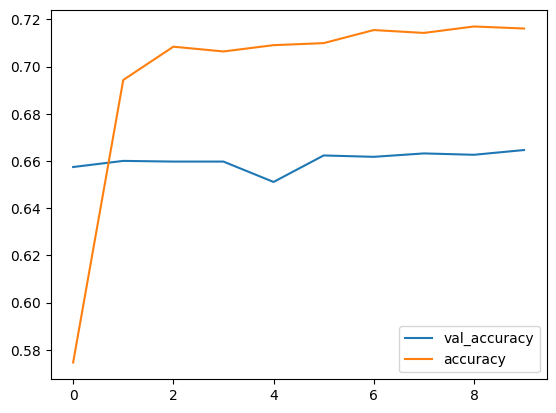

In [424]:
pd.DataFrame(history.history)[['val_accuracy','accuracy']].plot()

<Axes: >

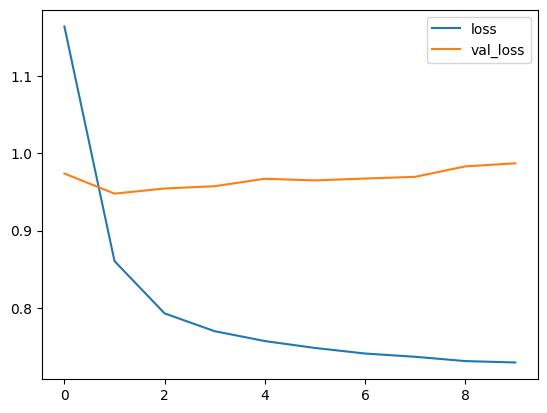

In [425]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()

# Model Inference

In this step, you will use the trained model to make predictions on new, unseen data (inference). Here’s an outline of the key points:

1. **Create Test Sample**:
   Create a string to test your modelm the goal here is to give the model Before making predictions, ensure that the new data is preprocessed in the same way as the training data. This includes tokenization, padding, and any other transformations you applied during the data preprocessing step. The data can be single text to see the result of the prediction.

2. **Model Prediction**:
   Use the `predict()` method to feed new samples into the trained model and obtain predictions. The model will output probabilities or predicted class labels based on the type of classification task (binary or multi-class).

3. **Interpreting Predictions**:
   The model will return probabilities for each class.

In [445]:
sample_text = "مباراة الامس كانت ممتعه"
sample_sequence = tokenizer.texts_to_sequences([cleanup(sample_text[0])])

padded_sample_sequence = pad_sequences(sample_sequence, maxlen=300, padding='post')

predicted_label = model.predict(padded_sample_sequence).argmax()

print("Predicted label:", label_encoder.inverse_transform([predicted_label]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Predicted label: ['Sports']


# Notebook Question:
- How did you handle text preprocessing? Why did you choose this approach?

- Why did you choose this model design?

- Why did you pick this number of layers or units for the model?

- Why did you select these evaluation methods?

- Does your model show signs of overfitting or underfitting? How do you know?

- What changes could you make to improve the model and fix overfitting or underfitting?

Answer Here:

- when handling pre-processing i removed links first and unwanted character such as english..., then removed tashkeel and tatweel since tashkeel will interupt my looooongation removal, after that i applied stemming then stopword removing since stemming maight produce a stopword.. after that applying hamza unifying because i think it doesn't matter anyway.

- i choosed RNN with simple arch to train the model fast enough

- layers and units as i heard its better to make is 2^2 but anyway it's not that important

- for evaluation method i applied accuaracy since the classes are almost balanced, i know its better to augment the data but theres no time to search

- it seems like its under fitting because while monitoring the training process i noticed that val_loss isn't decreasing and the accuaracy is not high so its not overfitting.

-for the future i think more processing will be great and applying lemmetization instead of stemming that would help with the model